# Day 10

Fuente: https://www.kaggle.com/datasets/patrickzel/flight-delay-and-cancellation-dataset-2019-2023?select=flights_sample_3m.csv

In [135]:
import pandas as pd

In [136]:
df_flights = pd.read_csv('https://www.kaggle.com/datasets/patrickzel/flight-delay-and-cancellation-dataset-2019-2023?select=flights_sample_3m.csv')

In [137]:
df_flights.shape

(3000000, 32)

In [138]:
df_flights.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [139]:
airline_counts = df_flights['AIRLINE'].value_counts()
airline_counts

AIRLINE
Southwest Airlines Co.                576470
Delta Air Lines Inc.                  395239
American Airlines Inc.                383106
SkyWest Airlines Inc.                 343737
United Air Lines Inc.                 254504
Republic Airline                      143107
Envoy Air                             121256
JetBlue Airways                       112844
Endeavor Air Inc.                     112463
PSA Airlines Inc.                     107050
Alaska Airlines Inc.                  100467
Spirit Air Lines                       95711
Mesa Airlines Inc.                     65012
Frontier Airlines Inc.                 64466
Allegiant Air                          52738
Hawaiian Airlines Inc.                 32114
Horizon Air                            20634
ExpressJet Airlines LLC d/b/a aha!     19082
Name: count, dtype: int64

In [140]:
cumulative_percentage = airline_counts.cumsum() / airline_counts.sum() * 100
cumulative_percentage

AIRLINE
Southwest Airlines Co.                 19.215667
Delta Air Lines Inc.                   32.390300
American Airlines Inc.                 45.160500
SkyWest Airlines Inc.                  56.618400
United Air Lines Inc.                  65.101867
Republic Airline                       69.872100
Envoy Air                              73.913967
JetBlue Airways                        77.675433
Endeavor Air Inc.                      81.424200
PSA Airlines Inc.                      84.992533
Alaska Airlines Inc.                   88.341433
Spirit Air Lines                       91.531800
Mesa Airlines Inc.                     93.698867
Frontier Airlines Inc.                 95.847733
Allegiant Air                          97.605667
Hawaiian Airlines Inc.                 98.676133
Horizon Air                            99.363933
ExpressJet Airlines LLC d/b/a aha!    100.000000
Name: count, dtype: float64

In [141]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Pareto Chart

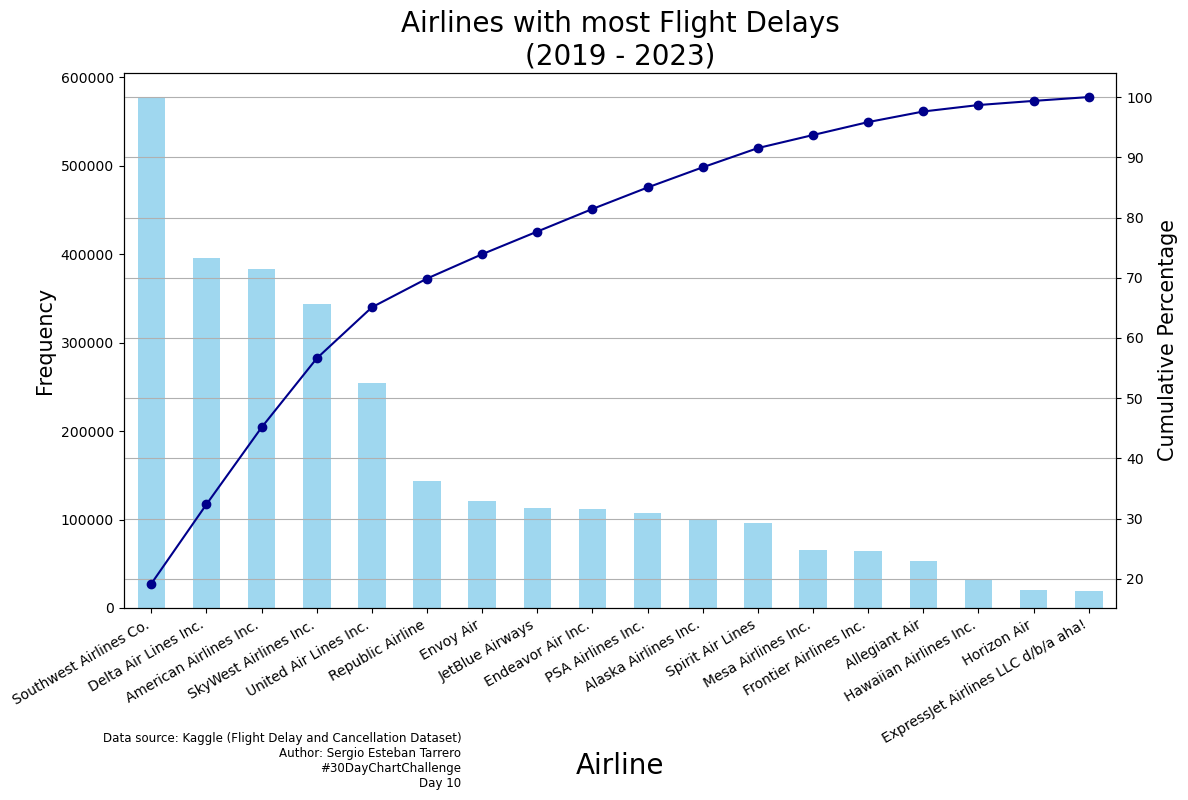

In [142]:
fig, ax = plt.subplots(figsize=(12, 8))
airline_counts.plot(kind='bar', ax=ax, color='skyblue', alpha=0.8)
ax2 = ax.twinx()
ax2.plot(cumulative_percentage, color='darkblue', marker='o')

ax.set_xlabel('Airline', fontsize=20)
ax.set_ylabel('Frequency', fontsize=15)
ax2.set_ylabel('Cumulative Percentage', fontsize=15)
ax.set_title('Airlines with most Flight Delays\n(2019 - 2023)', fontsize=20)

ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.figtext(0.39, 0.01, 'Data source: Kaggle (Flight Delay and Cancellation Dataset)\nAuthor: Sergio Esteban Tarrero\n#30DayChartChallenge\nDay 10', horizontalalignment='right', fontsize=8.5)

ax2.grid(True)
plt.tight_layout()

plt.savefig('SergioEstebanTarreroDay10.png', dpi=300, bbox_inches='tight', pad_inches=0.5, transparent=False)
plt.show()